<h1 align="center"><b>Federated Machine Learning and Applications in Marketing</b></font></h1>
<h2 align="center">Applied Predictive Analytics (SoSe 2021)</h2>


<ul>
<li>David Steiner
<li>Muhammad Najati Alimam
<li>Sascha Geyer

Presentation Slides: https://docs.google.com/presentation/d/1MjSrdRKeS2O0crnxeGVySTroK5ysOvJbiWppK7kLMJs/edit?usp=sharin

# Topic Description

Machine learning (ML) relies on data. More data is always better. Sharing data (e.g., between companies) could be a way to raise the amount of available data and build better ML models. However, sharing data is not trivial and can easily infringe privacy especially if the data relates to people. Federated learning is an approach to train ML models in a decentralized manner. This means that the entire training data does not need to be available on a single computer. Model training works without actually sharing the data between different entities. The Wikipedia page provides a useful introduction, and so does this entry from Google's AI blog. Promising a balance between enterprises' desire for more data and better models and consumers' preference for higher degrees of privacy, federated learning is a hot topic in industry. The overall goal of the topic is to give an overview of the state-of-the-art in federated learning. To the best of our knowledge, available research papers focus largely on applications in health care and medical data analysis (e.g., <i>Vaid et al.</i> 2020). Applications in the management sciences are yet scarce. Therefore, a second objective of the topic is to provide empirical evidence of the potential of federated learning (or lack thereof) in the scope of marketing analytics. To that end, students will prototype a federated learning system and try to train ML models in a decentralized manner. At least of the available papers on federated learning have made their codes available, ensuring the feasibility of this task.

# 1. Introduction

## 1.1 What is Federated Learning?



Federated learning is a privacy-preserving machine learning concept that facilitates model training across data providers without the need of data exchange. Instead of aggregating and centralizing data from multiple sources, data providers form a distributed federation. All participants of the federation train a global model collaboratively by sharing their locally learned model parameters rather than the underlying, possibly sensitive, data (<i>Konečný et al.</i>, 2015).
The resulting learning effect is massively enhanced by incorporating the information from training different data. Several models are trained in parallel and the accuracy of the individual models increases. In the digital health industry, federated learning is known to hold great potential to gain knowledge from highly sensitive and tightly regulated data such as patient records. But what role can federated learning play in e-commerce and marketing analaytics? In this post we want to shed light on this question by introducing the concepts and architectures behind federated learning and apply them to e-commerce data.


<p><b>Federated Learning Model Architecture</b></p>
<p>In the following, we want to briefly explain the basic concept behind federated learning. Therefore, we are going to examine the federated neural architecture in the so-called aggregation server approach depicted in the following illustrations.
</p>

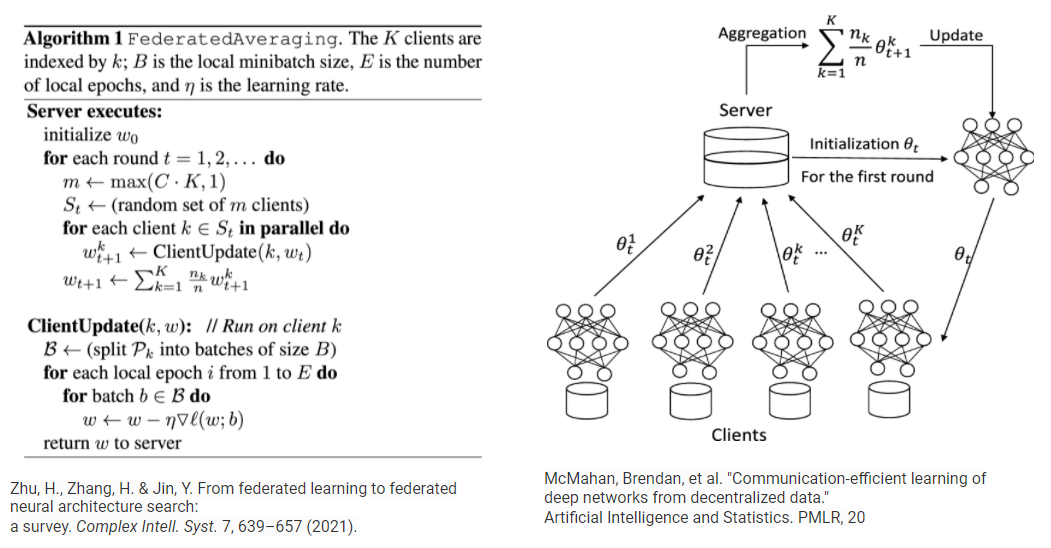

<p>As a first step, the weights <b>w<sub>
0</sub></b> (and biases) of the global aggregation model are randomly initialized. A fraction <b>C</b> of <b>K</b> clients is sampled from the federation to form a random subset <b>S<sub>t</sub></b> of <b>m</b> clients. For each round <b>t</b>, the current weights <b>w<sub>t</sub></b> are sent to each client <b>k</b> in the subset <b>S</b>. The clients perform stochastic gradient descent on their local data in parallel for <b>E</b> epochs and send the updated weights back to the server model. The server takes the weighted average of all client weight updates to calculate <b>w<sub>t+1</sub></b> and initialize a new round <b>t</b>.</p>
<p>The aggregated loss function <b>f(w)</b> is the average of all client loss functions <b>F<sub>k</sub>(w)</b> weighted by their amount of training data <b>n<sub>k</sub></b></p>

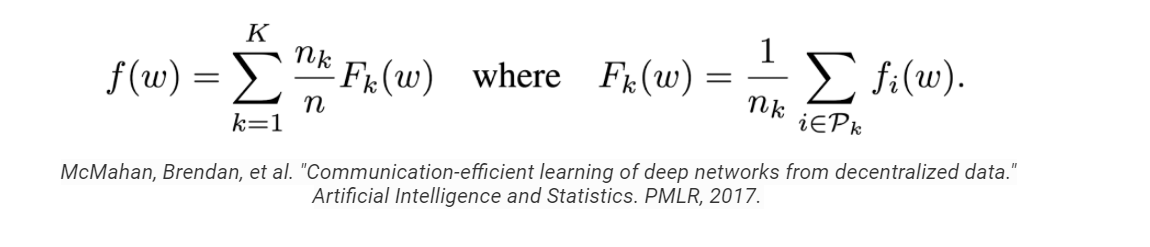

Apart from the typical aggregation server approach there is also an alternative formulation of federated learning which is called the “peer-to-to-peer” approach. In this case each training client exchanges the locally trained parameters with a subset of peers and all clients perform the model aggregation process themselves (<i>Rieke et al.</i>, 2020).

## 1.2 Federated Learning Categorization



<p>The literature distinguishes between three categories of federated learning: horizontal, vertical, and transfer federated learning. In the next step we will introduce and separate these concepts and their respective applications which will serve as a preparation for our practical analysis.</p>
<p><b>I) Horizontal Federated Learning</b></p>
<p>In horizontal or also called “sample-based” federated learning, a high intersection in the feature space is utilized to merge datasets with diverging sample space. One example we propose is the combination of client data collected by two major mobile communication service providers in Germany. Since phone users usually stick to one provider, they are expected to have a different customer base, but very similar feature space. Thus, in a federation of data providers a global model would be trained on a combined dataset that includes all common features.</p>
<p><b>II) Vertical Federated Learning</b></p>
<p>Vertical federated learning, also known as “feature-based” learning works the other way around. In this case, we have a high overlap of identifiable observations and therefore we merge by keeping all the features and dropping uncommon samples. Combining the divergent feature space for all mutual observations is expected to increase the predictive power of the model. One example we suggest is customer data collected from a major German mobile communication service provider and the principal electricity supplier in Germany. Both datasets are expected to have a significant overlap in observations, however, the feature space will not be congruent.  </p>
<p><b>III) Federated Transfer Learning</b></p>
<p>Last but not least, the third approach is called federated transfer learning. In this use case, we exhibit a low intersection of both feature and sample space. Therefore, we train a model on the source domain and reuse the model parameters for a target space on non-overlapping observations. The example we present is the combination of client data collected by a German mobile communication service provider and a French electricity supplier. We expect both datasets to have little intersection in feature and sample space.</p>

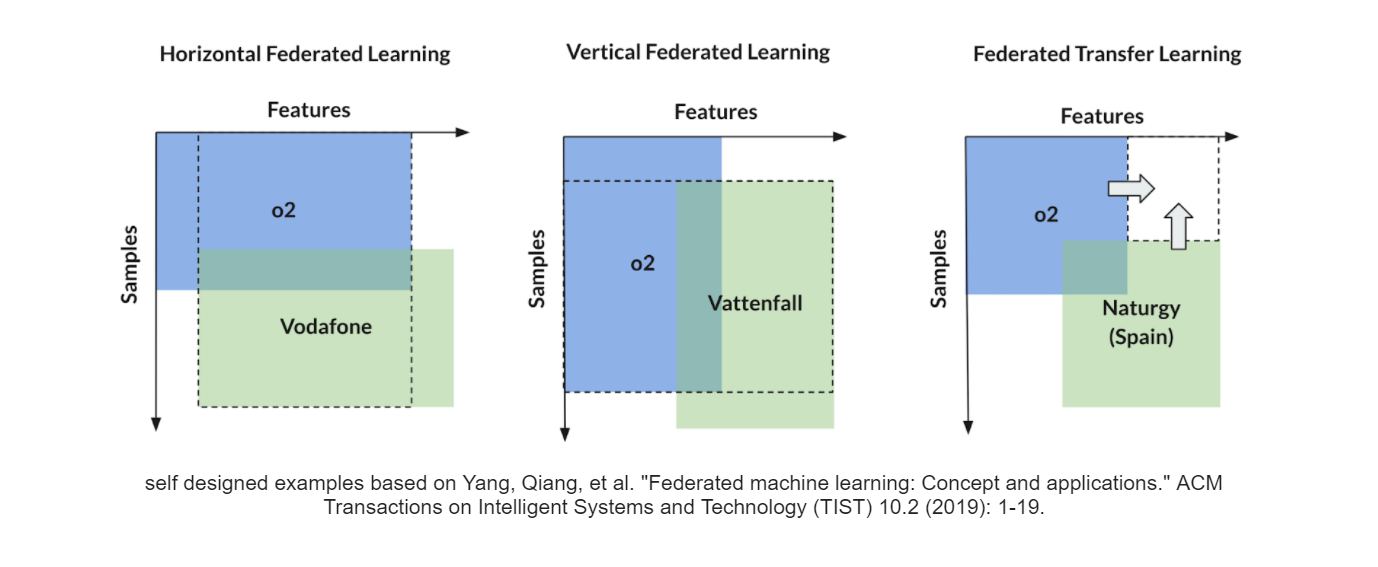

# 2. Research Overview
Before we dive deep into empirical analysis and prototyping with python, we will briefly review the current state of research in the field of federated machine learning. Therefore, we will split the overview into three different sections. First, we are going to illustrate the pioneering and most influential authors and publications in the field of federated learning. Afterwards, we will examine current trends and topics that are dominating the literature at the moment. And finally, we will shed light on the intersection of marketing analytics and federated learning.

### 2.1 Federated Learning Pioneers and Influential Publications
<i>Konečný, Jakub, et al.</i> were the first to address federated learning as a new emerging research topic in 2015. Introducing the term “federated optimization”, the authors present an algorithm to train a high-quality centralized model on an enormous amount of distributed data nodes (<i>Konečný</i>, 2015). They suggest the example of training a machine learning model locally on users' mobile devices, which respectively contribute small amounts of data points which is not expected to be representative for the comprehensive data distribution. The central challenges tackled also in the following publications concern communication efficiency, as well as model and computational performance. Konečný, Jakub, et al. 
suggest two techniques to drastically reduce communication costs in federated learning. They distinguish between “structured updates”, where parameters are trained on a bootstrapped lower-dimensional random feature space, and “sketched updates”, where updating parameters are compressed using quantization, random rotations, and subsampling to facilitate server communication (<i>Konečný</i>, 2016). Applying their techniques both on a convolutional model using the Cifar-10 dataset and a LSTM next-word prediction model using reddit data, the authors show that communication costs are reduced significantly.
<i>Yang, Qiang, et al.</i> give an overview of federated learning categories and related architectures by differentiating between vertical and horizontal federated learning as well as federated transfer learning.
Another meaningful contribution in the field of high scale federated learning was made by <i>Bonawitz, Keith, et al.</i> in 2019. The authors developed a system consisting of a huge federation of Android mobile devices contributing to a deep neural network. They focused on solving and pointing at operational (client-, protocol- and server-side) challenges such as unreliable connectivity and execution or limited memory and storage (<i>Bonawitz</i>, 2019). 
<i>Kairouz, Peter, et al.</i> give a general overview of achievements and challenges in the field of federated learning (<i>Kairouz</i>, 2019). They address the efficiency and effectiveness of federated applications, as well as privacy and security strategies, covering a variety of attacks and failures to defend against. Moreover, they tackle sources of bias in federated training data and system induced bias.


### 2.3 IoT & Edge Computing
One evergreen research focus in federated learning is Edge Computing and the Internet of Things (IoT). The large overlap in these research fields is little surprising since all three are based on the same distributed system architecture with often vast amounts of clients.
Edge computing, in contrast to cloud computing, refers to the approach of carrying out computations locally on the “edge” of the network rather than on a remote server. By moving calculations from distant data centers to their actual origin, response times can be dramatically reduced. 
Federated learning is considered an enabling technology in IoT and Edge Computing since it facilitates collaborative, and secure model training across mobile clients. The related literature is predominantly engaged with communication costs, resource allocation and privacy or security concerns in large-scale and complex mobile edge networks (<i>Lim</i>, 2020). <i>Wang et al.</i> propose a framework called “In-Edge AI” that integrates the Deep Reinforcement and Federated Learning techniques with mobile edge systems to optimize mobile edge computing, caching and communication.

### 2.4 Blockchain
Another literature stream we indentified to enjoy increasing popularity, is the application of blockchain concepts in federated learning. So-called blockchained federated learning (BlockFL) is the idea of replacing the central aggregation server by a consensus mechanism which is established between all participating devices in order to exchange and review local model parameters. In addtion to problems originating from centralized systems such as single point of failure, it is argued that vanilla federated learning is lacking a rewarding concept for unbalanced local device contributions (<i>Kim, Hyesung, et al.</i>, 2019). The authors propose to reward clients proportionally to their available training data.
It is suggested that blockchained federated learning furthermore expands the federation size by incorporating untrustworthy clients through a training-based validation process. This process involves so-called miners with unrestricted energy supply which verify and exchange local model updates received from corresponding training devices. Miners store model updates in blocks which are addded to a distributed ledger, also referred to as the blockchain.
The research on Blockchain-based federated learning has a strong focus on gradient encryption techniques, incentive mechanisms and security. For example, Desai et al. propose what they call blockchain-based federated learning with accountability in order to detect and penalize system communication attackers after the training process.

### 2.2 Covid-19
A recent trend we observe in the literature, is the application of federated machine learning models on Covid-19 related datasets. <i>Zhang, Weishan, et al.</i> propose a dynamic fusion-based federated learning method for image-based Covid-19 detection in order to increase state-of-the-art model accuracy and decrease communication costs. 
<i>Vaid, Akhil, et al.</i> in contrast focus on predicting mortality rates for Covid-19 patients of 5 different hospitals using 7 day time interval data. The employed models inlcuded a regularized logistic regression and a simple neural network. Since research on Covid-19 is heavily based on X-ray image analysis, most deep learning models work with convolution layers as we can see in the table below.

| Authors                | Topic Category         | No. of Models | Models & Algorithms                                                                                                                                                                                     |   |
|--------------------------|------------------------|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|
| (Konečný, et al., 2015)  | Pioneering/Influential | 3                  | DNN (Deep NN), COCOA, SVRGfo (proposed)                                                                                                                                                                          |   |
| (Konečný, et al., 2016)  | Pioneering/Influential | 7                  | DNN (GD, SGD, RCD (Randomized Coordinate Descent), SDCA (Stochastic Dual Coordinate Ascent), SAG (Stochastic Average Gradient), SVRG (Stochastic Variance Reduced Gradient), Stochastic Quasi-Newton Methods) |   |
| (Konečný, et al., 2016)  | Pioneering/Influential | 2                  | CNN, LSTM                                                                                                                                                                                       |   |
| (Smith, et al., 2017)    | Pioneering/Influential | 4                  | COCOA, MOCHA (proposed), SGD, SDCA (stochastic dual coordinate ascent)                                                                                                                                  |   |
| (Zhao, et al., 2018)     | Pioneering/Influential | 1                  | CNN                                                                                                                                                                                              |   |
| (Yang, et al., 2019)     | Pioneering/Influential | 1                  | DNN                                                                                                                                                                                                     |   |
| (Bonawitz, et al., 2019) | Pioneering/Influential | 1                  | DNN                                                                                                                                                                                                     |   |
| (Wang, et al., 2019)     | Pioneering/Influential | 5                  | SVM, Linear Regression, K-means, CNN (SGD)                                                                                                                                                              |   |
| (Wang, et al., 2019)     | IoT/Edge Computing     | 1                  | DRL (Deep Reinforcement Learning)                                                                                                                                                                       |   |
| (Kairouz, et al., 2019)  | Pioneering/Influential | 1                  | DNN                                                                                                                                                                                                |   |
| (Lu, et al., 2019)       | IoT/Edge Computing     | 3                | CNN, RNN (SGD), LAG (Lazily Aggregated Gradient)                                                                                                                                                        |   |
| (Kim, et al., 2019)      | Blockchain             | 1                  | BlockFL (blockchained federated learning)                                                                                                                                                               |   |
| (Li, et al., 2020)       | Pioneering/Influential | 1                  | DNN                                                                                                                                                                                                     |   |
| (Khan, et al., 2020)     | IoT/Edge Computing     | 2                | COCOA, DNN                                                                                                                                                                                              |   |
| (Li, et al., 2020)       | Blockchain             | 2                  | BFLC (proposed Blockchain-based Federated Learning framework with Committee consensus)                                                                                                                  |   |
| (Lim, et al., 2020)      | IoT/Edge Computing     | 5                | DNN, CNN, RNN, SVM, DDQN (Double Deep Q-Network)                                                                                                                                              |   |
| (Zhang, et al., 2021)    | Covid-19               | 3                  | GhostNet, ResNet50, ResNet101                                                                                                                                                                           |   |
| (Kumar, et al., 2021)    | Blockchain, Covid-19   | 11               | Random Forest, CNN, Federated Blockchain and Capsule Network (proposed)                                                                                                                                 |   |
| (Feki, et al., 2021)     | Covid-19               | 2                  | VGG16, ResNet50 (CNNs)                                                                                                                                                                                  |   |
| (Qayyum, et al., 2021)   | Covid-19               | 1                  | CFL (clustered federated learning)                                                                                                                                                                      |   |
| (Desai, et al., 2021)    | Blockchain             | 2                | BlockFLA (proposed Blockchain-based Fderated Learning with Accountability), SignSGD                                                                                                                    |   |
| (Dou, et al., 2021)      | Covid-19               | 1                  | CNN                                                                                                                                                                                                     |   |
| (Nguyen, et al., 2021)   | Blockchain             | 1                  | DNN (FetchSGD)                                                                                                                                                                                                |   |
| (Yang, et al., 2021)     | Covid-19               | 1                  | FCN (Fully Convolutional Network)                                                                                                                                                                       |   |
| (Vaid, et al., 2021)     | Covid-19               | 2                  | DNN, Logistic Regression                                                                                                                                                                       |   |

# 3. Potential of FL in Marketing Analytics

<p>In the following, we will elaborate on the potential of federated learning in the context of e-commerce and marketing analytics. For companies with limited data access, federated learning can open the door to the development of data-driven processes and services. In use cases involving the analysis of rare events or special data protection regulations, federated learning can help to achieve high model quality and reliable results much faster. Federated learning therefore has the potential to significantly reduce the time-to-market of AI solutions, thereby saving costs and generating added value more quickly. There are in particular three main potentials that we identified to have the largest impact on e-commerce businesses.</p>

## 3.1 Data Privacy/Security and GDPR Compliance
<p>Particularly in healthcare, meaningful and comprehensive datasets are difficult to obtain due to the sensitivity of patient information. One example is the image processing of magnetic resonance imaging (MRI) scans for tumor detection. Medical institutions rely on their own datasets, but these may be skewed by demographic characteristics. Federated learning can help to gain experience from a broad database without having to share sensitive clinical data. Differential privacy can be used to additionally increase anonymization for personal data. In this case, noise is superimposed on the parameter estimation to prevent inferences about individuals. 

We note that federated learning facilitates the prevention of reidentifying unique medical data such as clinical images or also genomic patient information. In the field of marketing analytics in contrast, this type of data is hardly ever encountered. The majority of relevant datasets can be subjected to an anonymization process that prevents reidentification without sacrificing model performance.
This is due to the fact that healthcare models often need to be trained directly on the personal data (e.g. DNA sequences), whereas in marketing analytics personal data (mobile number, email address) can often be left out or anonymized (e.g. shortening personal address to zip code).
However, even for anonymized data, federated learning can offer advantages concerning data privacy and security. One example is risk reduction of data security breaches. By narrowing down the number of data warehouse or database access receivers companies can significantly reduce the risk of erroneously providing confidential information with third parties. 
</p>

## 3.2 Data Governance and Access Management
<p>
Having a secure and transparent data access management is crucial for data-driven e-commerce companies. Federated learning helps at avoiding large-scale provisioning of API and database access rights. Keeping valuable data behind corporate firewalls also protects from the hazard of unauthorized data replication and subsequent third party sharing, allowing a truly effective data protection strategy. Moreover, the upstream data tailoring process in high-dimensional feature spaces (orders, categories, newsletter, website/ interaction, conversion, etc.) is significantly reduced.

Federated Learning also facilitates product and service billability through purpose-driven access management. E-commerce data administration is expensive and time consuming. Thus, carefully maintained and administered data warehouses hold enormous business value. With federated learning companies gaining fine-grained control over this value and to what extent it is sold, shared or published.
This is possible by selling only an increase in knowledge for specific research purposes instead of bulky datasets that might compromise yet unknown information value. This way e-commerce companies have fine-grained data access control.
</p>

## 3.3 Data Availability and Diversity/Heterogeneity
<p>Apart from data security and access management, there is a third potential in the application of federated learning in e-commerce, and that is the increase in data availability and diversity. In any data science problem, the volume and heterogeneity of data is crucial for the generalization process of models and algorithms. Especially in use cases involving the analysis of rare events - like conversion rates -, a lack of sufficient training data may cause the model to not generalize at all. Using only self-collected, potentially homogeneous and skewed data might also lead to overfitting. For this reason, it is important to incorporate as much valuable data and heterogeneity as possible into the model. With federated learning, a global model can be trained considering all available data without even the need of requesting data access. This procedure will pave new paths for inter-corporate data exchange management and novel market opportunities.</p>

# 4. Empirical Analysis




In the following section we will demonstrate an experimental implementation of federated machine learning based on e-commerce data. After conducting an explanatory data analysis to understand the character and shape of the presented datasets, we are going to examine different classifiers such as logistic regression and neural networks in order to forecast the probability of client conversion. Subsequently, we are going to introduce three different model architectures (global, local and federated) and compare their performances. We then investigate under which conditions the federated learning architecture outperforms models trained on locally available data. In this context we focus primarily on the average size of datasets and the number of entities within the federation.

## <b>4.1 Setup</b>
In the following we will import all required packages and configure the path.

In [1]:
#Import required packages
from glob import glob
from pathlib import Path
import math
import pandas as pd 
import numpy as np 
import pickle 
import time
from collections import Counter

from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)}) #Seaborn figure size
sns.set(font_scale=1) #Seaborn font size
flierprops = dict(markerfacecolor='0.75', markersize=5, linestyle='none') #Make outliers gray when using boxplot
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None  # removes warning messages
#pd.set_option('display.max_rows', None) #removes print() truncation
#pd.set_option('display.max_columns', None) #removes print() truncation
#pd.reset_option("all") #use this to reset above 3
pd.set_option('display.float_format', '{:.2f}'.format) # to remove number truncation

import sys
import os

In [2]:
# Create a global variable to idicate whether the notebook is run in Colab
IN_COLAB = 'google.colab' in sys.modules

# Configure variables pointing to directories and stored files 
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/gdrive')
  os.chdir('/content/gdrive/My Drive/APA SoSe21/Final Submission Folder')
  print(os.getcwd())
  !ls
else:
  print('Please select your local path (place datasets in same folder like notebook)')
  os.chdir(r"C:\Users\Light\Desktop\APA Code")
  print('Path set successfully!')

Please select your local path (place datasets in same folder like notebook)
Path set successfully!


## 4.2 Exploratory Data Analysis

The datasets we'll be working with belong to three e-commerce shops. The data was provided by <i>Lessmann et al.</i> which was collected for the paper "Conversion Uplift in E-Commerce: A Systematic Benchmark of Modeling Strategies"

<p>In each dataset one row corresponds to one shop visit, and there are 2 candidate target variables. One is continous and shows the amount of money spent for the purchase, the other shows whether a purchase was made. This allows for both classification and regression approaches.

The data also includes a treatment indicator, which indicates that a visitor received a digital coupon. It was determined by the provider of data that the uplift was low in each data set, therefore, we can safely discard that feature, but we will get there in a bit.
    
In the next steps, we will be going over several observations, however, here is a list of all features and a brief description taken from the paper cited above.

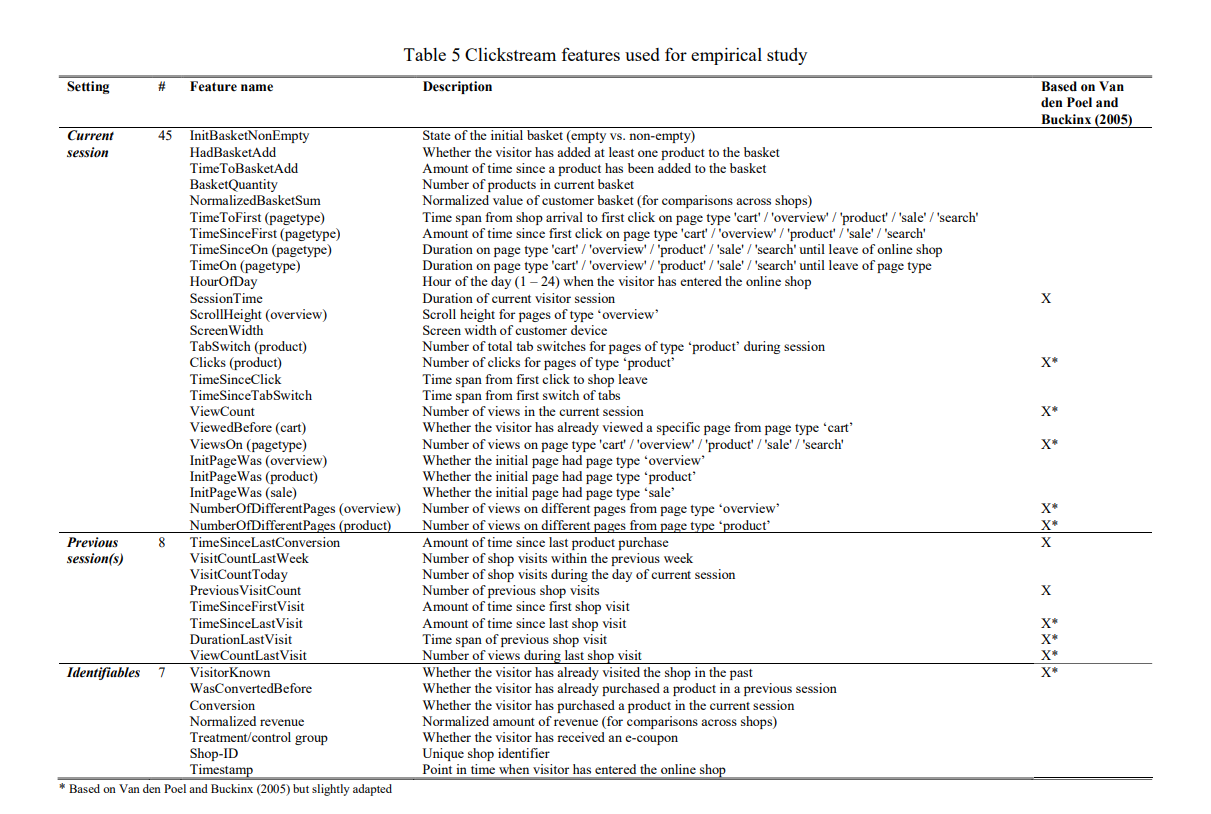

Let's import the data.

In [3]:
#Import data
bookstoys = pd.read_csv("data/BooksAndToys.csv")
fashiona = pd.read_csv("data/FashionA.csv")
fashionb = pd.read_csv("data/FashionB.csv")

As we will see, the datasets do not require a lot of effort in preprocessing of missing values, duplicates or data types. Our EDA functions are gathered in a separate .py file (EDA.py) with a description for each function. The functions names should be enough to indicate what they do though.

The shape of the datasets prior to cleaning looks like this: 
<ul>
    <li>bookstoys: 149299 Rows, 72 Columns </li>
    <li>fashiona: 1148779 Rows, 73 Columns </li>
    <li>fashionb: 668275 Rows, 73 Columns</li>
</ul>

Now, let's find out more about the datasets.

In [4]:
from EDA import check_na, check_duplicates, uncommon_features, compare_dtypes, corr_checker, box_plot, corr_with_target, target_percent, visualize_binaries, reduce_mem_usage, Zscore_outlier_counter, IQR_outlier_counter

First, we will check for missing values and duplicate observations. The functions below will do that for us. In addition, the <u>check_duplicates</u> function also removes duplicate rows.

In [5]:
print('Empty values', list(map(check_na, (bookstoys, fashiona, fashionb))))
print('Duplicate values', list(map(check_duplicates, (bookstoys, fashiona, fashionb))))

Empty values [None, None, None]
number of duplicate rows: 25
Duplicates Removed
number of duplicate rows: 133
Duplicates Removed
number of duplicate rows: 57
Duplicates Removed
Duplicate values [None, None, None]


As seen, there are no NA values and only a few duplicate rows.<p align="left"><font color=#FFA000>

### 4.2.1 Investigate if dataset structures are homogeneous 

A look at the number of columns/features shows that the <i>bookstoys</i> record has 73, while the others have 72. This may lead us to assume that <i>bookstoys</i> has an extra column. So let's check the common features in all 3 datasets. 

In [6]:
bookstoyslist = list(bookstoys)
fashionalist = list(fashiona)
fashionblist = list(fashionb)
common_features = set(bookstoyslist) & set(fashionalist) & set(fashionblist)
#print(common_features)
print(len(common_features))

69


There are 69 common features, which is interesting considering that our assumption was that 72 are common and <i>bookstoys</i> has an extra feature. Therefore, we need to investigate further. The function <u>uncommon_features</u> shows the difference in column names between two given datasets by substracting the column names of the second dataset from the first one (order matters), so let's compare each pair:

In [7]:
uncommon_features(fashionblist, fashionalist)
uncommon_features(bookstoyslist, fashionalist)
uncommon_features(fashionalist, bookstoyslist)

set()
{'SecondsSinceFirst.sale.', 'TimeSinceOn.sale.', 'TimeToFirst.sale.', 'TimeToFirst.search.', 'SecondsSinceFirst.search.', 'ViewedBefore.cart.', 'TimeSinceOn.search.'}
{'SecondsSinceFirst.sale.', 'TimeSinceOn.sale.', 'TimeToFirst.search.', 'TimeToFirst.sale.', 'SecondsSinceFirst.search.', 'ViewedBefore.cart.', 'TimeSinceOn.search.'}


As seen above, <i>fashiona</i> and <i>fashionb</i> have the same features, so we can treat them similarly, but they include features that are not present in <i>bookstoys</i> and vice versa. Our approach in this project is to do horizontal federated machine learning (more on that later). This means that our datasets have to be identical feature-wise.

To proceed, we have to drop some columns, and while we are at it, we will also drop the 'treatmentGroup' and 'checkoutAmount' features, which are the treatment indicator and regression target. As metioned in the datasets description, these as irrelevant for our approach.

In [8]:
bookstoys.drop(['treatmentGroup', "discount", 'SecondsSinceFirst.search.', 'TimeSinceOn.search.', 'TimeToFirst.search.', 'checkoutAmount'], inplace=True, axis=1)
fashiona.drop(['treatmentGroup', "discount", 'SecondsSinceFirst.sale.', 'TimeSinceOn.sale.', 'TimeToFirst.sale.', 'ViewedBefore.cart.', 'checkoutAmount'], inplace=True, axis=1)
fashionb.drop(['treatmentGroup', "discount", 'SecondsSinceFirst.sale.', 'TimeSinceOn.sale.', 'TimeToFirst.sale.', 'ViewedBefore.cart.', 'checkoutAmount'], inplace=True, axis=1)

Next, we will check if the datatypes across all 3 datasets match. The <u>compare_dtypes</u> function does that for us

In [9]:
compare_dtypes(dict(fashiona.dtypes), dict(fashionb.dtypes))
compare_dtypes(dict(bookstoys.dtypes), dict(fashiona.dtypes))
compare_dtypes(dict(bookstoys.dtypes), dict(fashionb.dtypes))

{'SessionTimeInSeconds': dtype('float64'), 'TimeToFirst.overview.': dtype('float64'), 'TimeToFirst.product.': dtype('float64'), 'SecondsSinceClick': dtype('float64'), 'DurationLastVisitInSeconds': dtype('float64')}
{'SessionTimeInSeconds': dtype('int64'), 'TimeToFirst.overview.': dtype('int64'), 'TimeToFirst.product.': dtype('int64'), 'SecondsSinceClick': dtype('int64'), 'DurationLastVisitInSeconds': dtype('int64')}
no conflicting datatypes


Weirdly, <i>bookstoys</i> and <i>fashionb</i> have the same datatypes, but both are different from <i>fashiona</i>. We need to have all formats unified and as small as possible to reduce memory consumption. The function <u>reduce_mem_usage</u> will do that here, but we need to combine the datasets into one and then separate them again, for the columns to have matching datatypes in all datasets.

In [10]:
# making a new column to distinguish when combining/separating
bookstoys['dataset']='bookstoys'
fashiona['dataset']='fashiona'
fashionb['dataset']='fashionb'

# combining datasets
dfs_all = bookstoys.append([fashiona, fashionb])

#applying the function
reduce_mem_usage("dfs", dfs_all)

# separating the datasets again
bookstoys = dfs_all.loc[dfs_all['dataset'] == 'bookstoys']
fashiona = dfs_all.loc[dfs_all['dataset'] == 'fashiona']
fashionb = dfs_all.loc[dfs_all['dataset'] == 'fashionb']

# dropping the column created
bookstoys.drop(['dataset'], inplace=True, axis=1)
fashiona.drop(['dataset'], inplace=True, axis=1)
fashionb.drop(['dataset'], inplace=True, axis=1)


71.5% memory reduction for dfs (from 1020.03 MB to 290.63 MB)


In [11]:
compare_dtypes(dict(fashiona.dtypes), dict(fashionb.dtypes))
compare_dtypes(dict(bookstoys.dtypes), dict(fashiona.dtypes))
compare_dtypes(dict(bookstoys.dtypes), dict(fashionb.dtypes))

no conflicting datatypes
no conflicting datatypes
no conflicting datatypes


<p align="left">
Looks good. Features and datatypes are now identical across all datasets.
</p>

Next, we want to examine the correlation between different features. Basically this allows us to see if there are features that are highly correlated with our target to keep an eye on, second, there could be full-correlated features (redundant features) that can be dropped.

We can just plot the heatmap for the datasets, but considering the big amount of columns, the heatmap would look messy and unreadable. The function <u>corr_checker</u> only heatmaps features with correlation above 0.9. We think it is interesting to see those, so let's have a look and decide.

In [12]:
# naming the datasets for the function to name the heatmaps dynamically
bookstoys.name= "Books and Toys"
fashiona.name = "Fashion A"
fashionb.name = "Fashion B"

In [ ]:
# The line below displays 3 separate heatmaps, but we merged them into a single image for presentation and clarity.
list(map(corr_checker, (bookstoys, fashiona, fashionb))) 

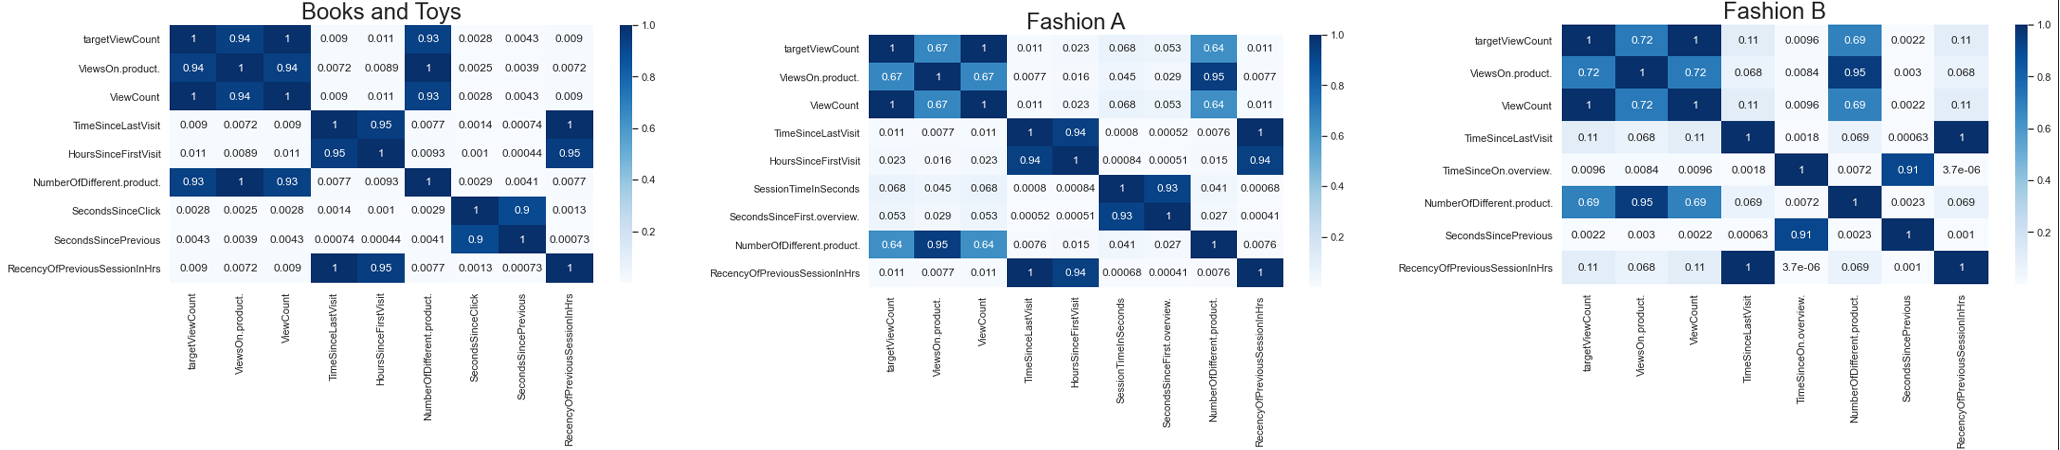

Looking at the heatmap, there are a few observations here:
<ul>
<li>'ViewCount' and 'targetViewCount' are fully correlated in all 3 datasets. 'ViewCount' refers to the number of views in the current session, but no description is provided for 'targetViewCount'. Judging by the name and full correlation, we assume they are the same feature. We will drop the latter.</li>
<li>'TimeSinceLastVisit' and 'RecencyOfPreviousSessionInHrs' are fully correlated in all 3 datasets. 'TimeSinceLastVisit' refers to the amount of time since last shop visit, but no description is provided for 'RecencyOfPreviousSessionInHrs'. Judging by the name and full correlation, we assume they are the same feature. We will drop the latter.</li>
<li>'ViewsOn.product.' and 'NumberOfDifferent.product.' are fully correlated only in the <i>bookstoys</i> dataset. Since we need all datasets to be identical, we cannot drop one of these.</li>
</ul>

In [14]:
# Dropping fully correlated features
bookstoys.drop(["targetViewCount", "RecencyOfPreviousSessionInHrs"], inplace=True, axis=1)
fashiona.drop(["targetViewCount", "RecencyOfPreviousSessionInHrs"], inplace=True, axis=1)
fashionb.drop(["targetViewCount", "RecencyOfPreviousSessionInHrs"], inplace=True, axis=1)

### 4.2.2 Investigate homogenity among datasets

Next, we will get a closer look at how these datasets differ from each other. We can start by visualising the difference in the target variable.

<AxesSubplot:xlabel='converted', ylabel='count'>

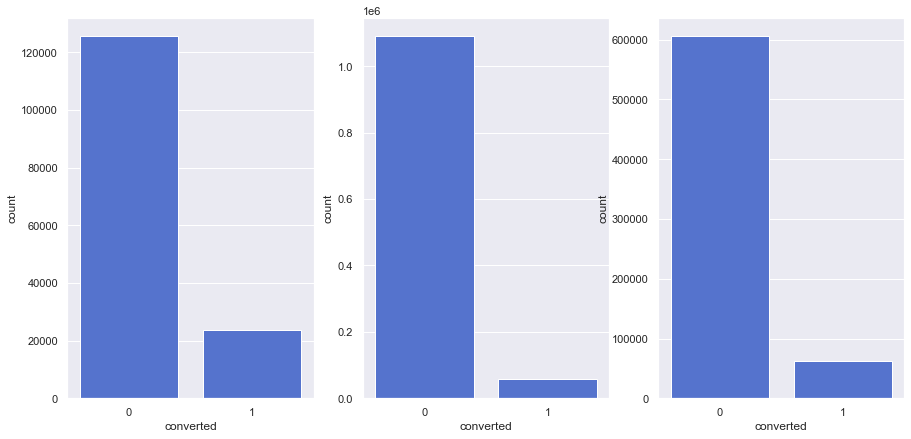

In [15]:
sns.set(rc={'figure.figsize':(15,7)})
fig, ax =plt.subplots(ncols=3)
sns.countplot(x ="converted", data=bookstoys, color="royalblue", ax=ax[0])
sns.countplot(x ="converted", data=fashiona, color="royalblue", ax=ax[1])
sns.countplot(x ="converted", data=fashionb, color="royalblue", ax=ax[2])

Let us check how much is that in percetnage. The <u>target_percent</u> will do that for us

In [16]:
print("Percentage of converted shop visits")
print("bookstoys",target_percent(bookstoys))
print("fashiona", target_percent(fashiona))
print("fashionb", target_percent(fashionb))

Percentage of converted shop visits
bookstoys 18.81
fashiona 5.26
fashionb 10.21


It appears that there is a big imbalance in the target variable. We notice that very few customers actually buy (1), while in most cases, no purchase is made. The imbalance is not too severe, but it is also noticably different in each dataset. This might require some over/under sampling processing.

It is also a good idea to check correlation with our target, just to see whether certain features are highly correlated and have a direct/strong effect on our target. The <u>corr_with_target</u> function plots a heatmap of the target variable 'converted' with any other variables that have above 0.1 correlation. We chose 0.1 as a threshold, because as can be seen below, both <i>Fashion A</i> and <i>Fashion B</i> do not have any features with more than 0.2 with the target.

In [ ]:
# The line below displays 3 separate heatmaps, but we merged them into a single image for presentation and clarity.
list(map(corr_with_target, (bookstoys, fashiona, fashionb))) 

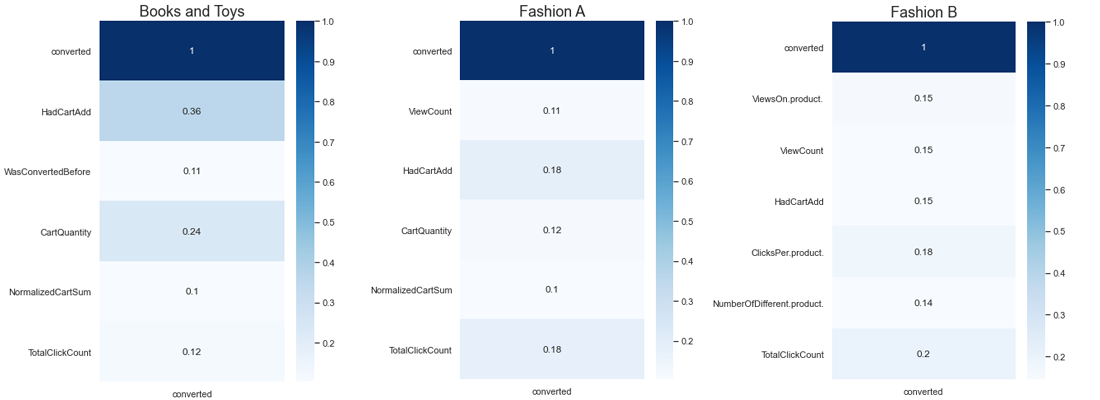

As seen above, there are a few features correlated with the target. The 'HadCartAdd' indicates whether a visitor had added at least 1 item to the basket. It is still early to judge whether there is causation here. However, it is a stronger indicator for the <i>bookstoys</i> dataset than it is for the other two, which requires further investigation, so let's visualize the relationship between 'HadCartAdd' and our target 'converted'.

The function <u>visualize_binaries</u> give us the count for each class and plot a bar chart comparing the provdided variables. While we're at it, we'll do the same for <i>Fashion A</i> and <i>Fashion B</i> as well.

In [ ]:
# The lines below displays 3 separate barcharts, but we merged them into a single image for presentation and clarity.
visualize_binaries(bookstoys, 'converted', 'HadCartAdd')
visualize_binaries(fashiona, 'converted', 'HadCartAdd')
visualize_binaries(fashionb, 'converted', 'HadCartAdd')

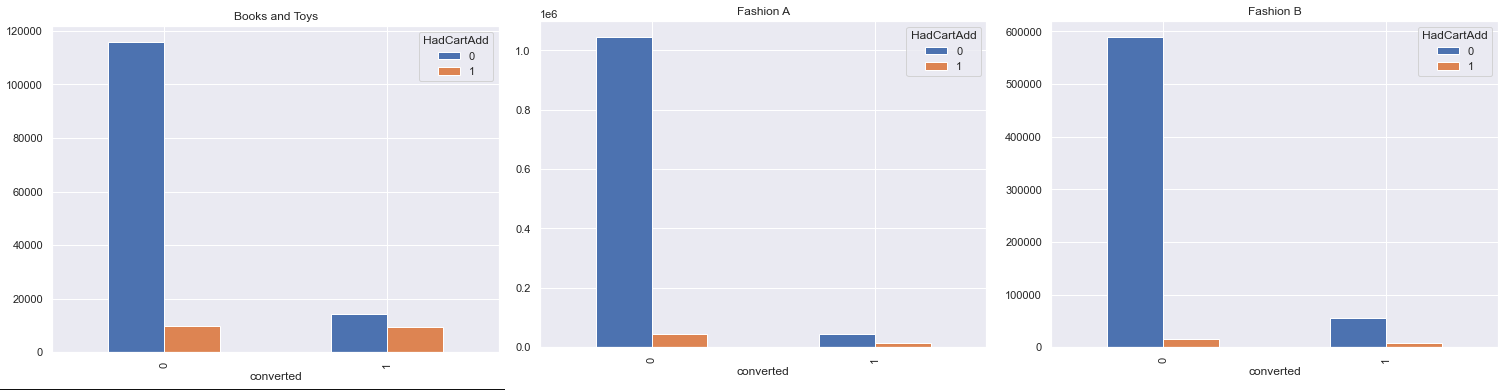

This is interesting. The <i>Books and Toys</i> dataset where we thought the 'HadCartAdd' feature plays a bigger role, shows that the 1s and 0s are more or less equal, therefore, we cannot say that this variable has an effect on our target. However, we do see that the 'HadCartAdd' slightly correlates with having bought or not in the other two datasets (this can be confirmed by taking the percentage of 'HadCartAdd' makes up of the whole category), which tells us that this might be a slight indicator. This makes sense. When adding an item to the cart, it is likely that a customer will make a purchase, but it seems this is more the case for <i>Fashion A</i> and <i>Fashion B</i> than it is for <i>Books and Toys</i>

Another assumption we usually make, is that there are frequent or regular buyers for each store. This is indicated by the 'WasConvertedBefore' feature, so let's visualize that relationship too.

In [ ]:
# The lines below displays 3 separate barcharts, but we merged them into a single image for presentation and clarity.
visualize_binaries(bookstoys, 'converted', 'WasConvertedBefore')
visualize_binaries(fashiona, 'converted', 'WasConvertedBefore')
visualize_binaries(fashionb, 'converted', 'WasConvertedBefore')

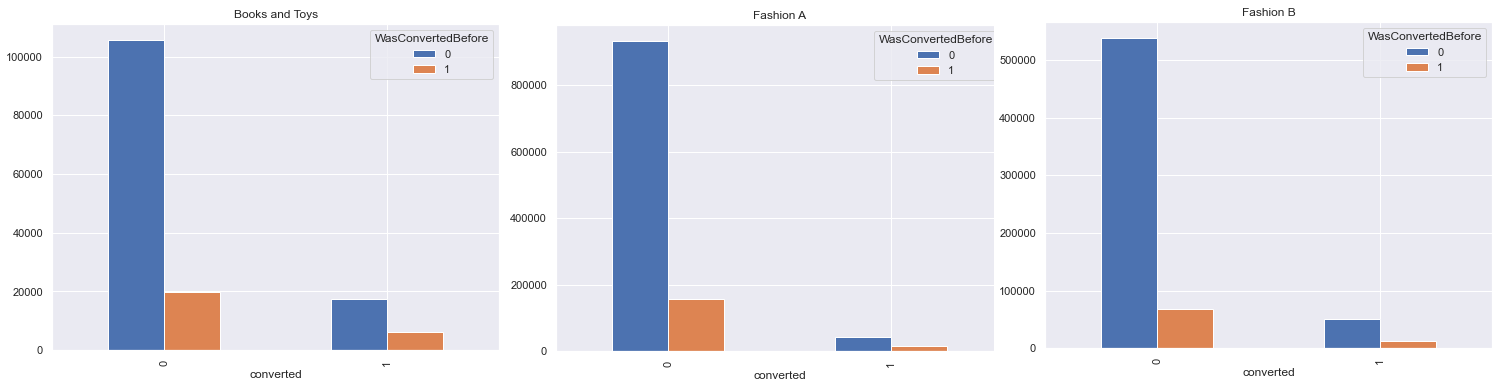

The results go along with our assumptions. It seems that customers who have bought before are likely to buy again, so customer history plays a role in predicting whether a purchase will be made. Again, this can be confirmed by taking the percentage of 'WasConvertedBefore' to the whole category (left are those who didn't make a purchase, right are those who did).

### 4.2.3 Investigate distribution of features

Another interesting thing we can look at, is the rest of features that show slight correlation with the target and how they are different in each dataset. At this point, it is important to mention that the data contains a lot of outliers. During our experimentation phase, we saw that there lies some important information in these outliers, and therefore decided not to truncate/remove them. This is more in-line with real life scenarios, as you would expect e-commerce stores to have many more browsers than buyers. In any way, the 2 functions below can give us a look at the amount of outliers we have using both IQR and a generous Zscore threshold. Then we will boxplot the few other features that are correlated with our target <b>excluding</b> outliers to compare.

In [17]:
print("According to Zscore")
print(Zscore_outlier_counter(bookstoys, 3))
print(Zscore_outlier_counter(fashiona, 3))
print(Zscore_outlier_counter(fashionb, 3))

print("According to IQR")
print(IQR_outlier_counter(bookstoys))
print(IQR_outlier_counter(fashiona))
print(IQR_outlier_counter(fashionb))

According to Zscore
There are 43032 rows with outliers in dataset Books and Toys out of: 149274 rows. percentage of outliers is: 29%. Zscore threshold is 3
There are 497444 rows with outliers in dataset Fashion A out of: 1148646 rows. percentage of outliers is: 43%. Zscore threshold is 3
There are 348744 rows with outliers in dataset Fashion B out of: 668218 rows. percentage of outliers is: 52%. Zscore threshold is 3
According to IQR
There are 23633 rows with outliers in dataset Books and Toys out of: 149274 rows. percentage of outliers is: 16%
There are 57354 rows with outliers in dataset Fashion A out of: 1148646 rows. percentage of outliers is: 5%
There are 61931 rows with outliers in dataset Fashion B out of: 668218 rows. percentage of outliers is: 9%


In [ ]:
# Each of the lines below should be run in a seprate cell. The plots were merged into a single image for presentation and clarity.
box_plot('Books and Toys',bookstoys[['CartQuantity', 'NormalizedCartSum', 'TotalClickCount', 'ViewCount',  'ViewsOn.product.', 'ClicksPer.product.', 'NumberOfDifferent.product.']])
box_plot('Fashion A',fashiona[['CartQuantity', 'NormalizedCartSum', 'TotalClickCount', 'ViewCount',  'ViewsOn.product.', 'ClicksPer.product.', 'NumberOfDifferent.product.']])
box_plot('Fashion B',fashionb[['CartQuantity', 'NormalizedCartSum', 'TotalClickCount', 'ViewCount',  'ViewsOn.product.', 'ClicksPer.product.', 'NumberOfDifferent.product.']])

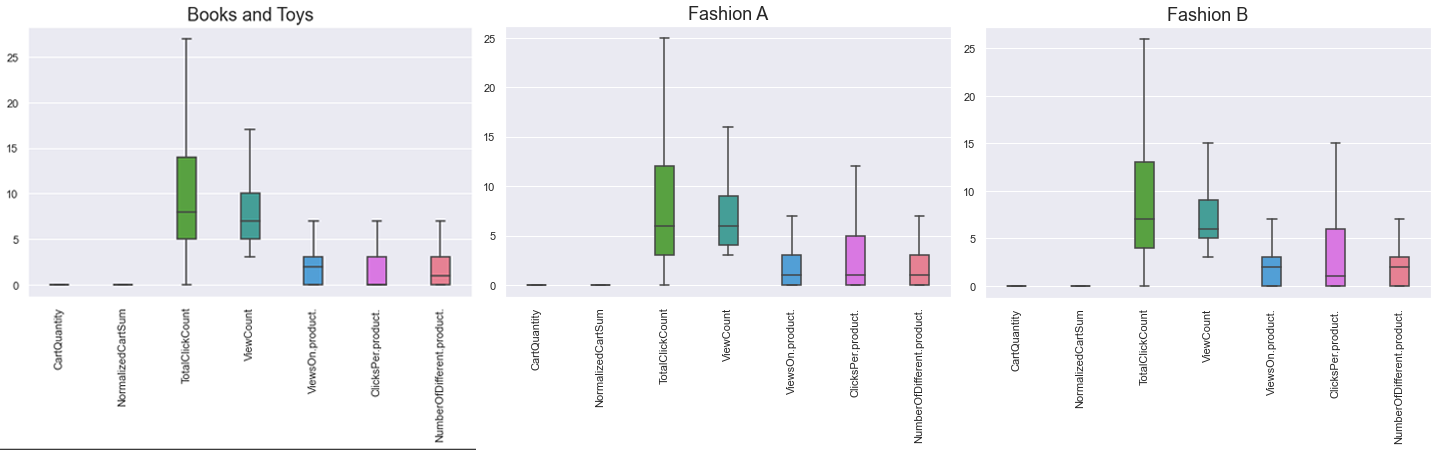

Proving our point above, these features look a bit similar. There are a few differences, but they don't justify their different correlation with the target. It is not always a good step to remove outliers, so we will keep them in this case. However, there are also some other features that are a bit different between datasets, we thought it is good to highlight them, even if they don't show correlation with our target.

In [ ]:
# Each of the lines below should be run in a seprate cell. The plots were merged into a single image for presentation and clarity.
box_plot('Books and Toys',bookstoys[['ViewsOn.search.', 'ViewsOn.overview.', 'ViewsOn.product.']])
box_plot('Fashion A',fashiona[['ViewsOn.search.', 'ViewsOn.overview.', 'ViewsOn.product.']])
box_plot('Fashion B',fashionb[['ViewsOn.search.', 'ViewsOn.overview.', 'ViewsOn.product.']])

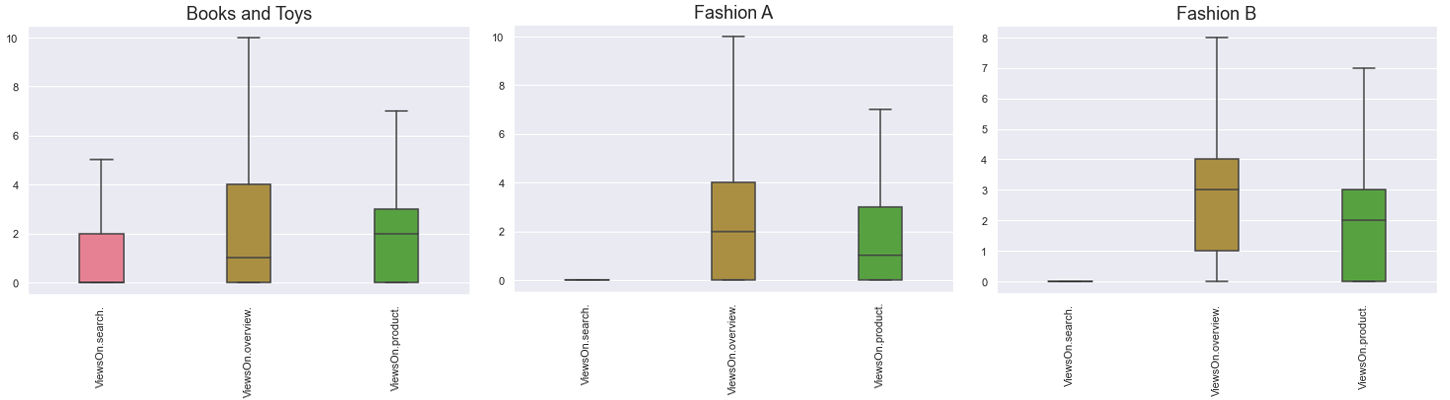

Boxplotting the remaining features would not be informative. It can be noticed however that the features have very different scales, which requires feature scaling and was thefore implemented into the framework below.

In [3]:
# Saving the datasets after cleaning
bookstoys.to_csv('data/cleaned_bookstoys.csv', index=False)
fashiona.to_csv('data/cleaned_fashiona.csv', index=False)
fashionb.to_csv('data/cleaned_fashionb.csv', index=False)

### 4.3 Federated Machine Learning

We start by importing our cleaned data and the files for the dataset generator and the federation framework.

In [ ]:
from dataset_generator import create_dataset
from federation import get_model_comparison

The dataset generator converts the data into the required structure for our federated learning framework and splits the data into training and test data. In addition, it min-max scales the data and can optionally balance the datasets based on the target by undersampling the most frequent target per dataset. 

The federation framework was proposed by <i>Vaid et al.</i> and originally used to predict covid mortality. The authors used data from 5 hospitals with a total of only 4000 samples and 10 features. 
A logistic regression with L1 regularization and a neural network classifier were trained in conjunction. To compare the results not only between the two classifiers, the authors also compared the federated learning results with the datasets trained locally (trained on hospital a and then tested on hospital a) and globally (trained on all hospitals and then tested on hospital a). The results showed that performance varied between the two classifiers and all hospitals, but the federated MLP outperformed the pooled MLP on all but one of the local models.

Because the structure of our e-commerce dataset is significantly different from the dataset used by the <i>Vaid et al.</i>, we had to make several changes to the framework. Some of the changes were adding more hidden layers to the neural network, experimenting with different epoch and batch sizes for optimal results and adding feature scaling and undersampling functionality for our imbalanced dataset to the framework. As our dataset also contains significantly more samples, our main focus was to investigate the performance differences compared to the locally trained models based on the sample size of the different entities, which will be explained in detail later.  

In [ ]:
bookstoys = pd.read_csv("data/cleaned_bookstoys.csv")
fashiona = pd.read_csv("data/cleaned_fashiona.csv")
fashionb = pd.read_csv("data/cleaned_fashionb.csv")

all_results = pd.DataFrame()

In [ ]:
#helper function that calculates the average number of samples/rows among all datasets
def get_avg_trainset_length(training_datasets):
    train_set_length = []
    for key in training_datasets:
        train_set_length.append(len(training_datasets[key][0]))
    mean_train_length = int(sum(train_set_length) / len(train_set_length))
    return mean_train_length

### 4.3.1 Standard Performance Comparison
In the following, we investigate the performance of the two classifiers when trained in a federated way, compared to when trained locally and globally. We use the entire training data of all e-commerce stores. Furthermore, we compare the performance when the dataset is undersampled and when it is not undersampled.

In [ ]:
%%time
bookstoys['Dataset_Id'] = 1
fashiona['Dataset_Id']  = 2
fashionb['Dataset_Id']  = 3

#Standard
full_data = bookstoys.append([fashiona, fashionb]).reset_index(drop=True)
training_datasets, testing_datasets = create_dataset(full_data, undersampling=False)
mean_train_length = get_avg_trainset_length(training_datasets)
results = get_model_comparison(training_datasets, testing_datasets, mode='standard')
results['avg_trainset'] = mean_train_length
all_results = all_results.append(results)

#Undersampled
training_datasets, testing_datasets = create_dataset(full_data, undersampling=True)
mean_train_length = get_avg_trainset_length(training_datasets)
results = get_model_comparison(training_datasets, testing_datasets, mode='standard_undersampled')
results['avg_trainset'] = mean_train_length
all_results = all_results.append(results)

Init Federated
Current fold: 0
64
MLP
Epoch: 0
Dataset: 1 / AUC: 0.5010922527240237
Dataset: 2 / AUC: 0.5002783279423235
Dataset: 3 / AUC: 0.5005848762238676
Epoch: 1
Dataset: 1 / AUC: 0.6066806757138469
Dataset: 2 / AUC: 0.6346334995141022
Dataset: 3 / AUC: 0.6245636771201157
Epoch: 2
Dataset: 1 / AUC: 0.7069170168660089
Dataset: 2 / AUC: 0.7463014042913405
Dataset: 3 / AUC: 0.6684023953503742
Epoch: 3
Dataset: 1 / AUC: 0.5974313890170719
Dataset: 2 / AUC: 0.6152735128345299
Dataset: 3 / AUC: 0.6192628582145367
Epoch: 4
Dataset: 1 / AUC: 0.6731467696438102
Dataset: 2 / AUC: 0.6607482021597573
Dataset: 3 / AUC: 0.5860509981533367
Epoch: 5
Dataset: 1 / AUC: 0.6711048895395719
Dataset: 2 / AUC: 0.6884451111271616
Dataset: 3 / AUC: 0.6020762147274349
Epoch: 6
Dataset: 1 / AUC: 0.6826979632643021
Dataset: 2 / AUC: 0.6954293970655919
Dataset: 3 / AUC: 0.6137821079005538
Epoch: 7
Dataset: 1 / AUC: 0.6769102009456491
Dataset: 2 / AUC: 0.7047332064590165
Dataset: 3 / AUC: 0.6355696679561753
Ep

In [ ]:
all_results

,MODEL,AUROC mean,AUROC min,AUROC max,SPLIT,MODE,avg_trainset
0,LASSO: Federated,0.62,0.59,0.65,0,standard,458765
1,LASSO: Global,0.52,0.48,0.56,0,standard,458765
2,LASSO: Local,0.59,0.54,0.67,0,standard,458765
3,MLP: Federated,0.69,0.66,0.72,0,standard,458765
4,MLP: Global,0.78,0.77,0.80,0,standard,458765
5,MLP: Local,0.78,0.76,0.80,0,standard,458765
0,LASSO: Federated,0.73,0.70,0.75,0,standard_undersampled,66842
1,LASSO: Global,0.70,0.66,0.72,0,standard_undersampled,66842
2,LASSO: Local,0.71,0.66,0.74,0,standard_undersampled,66842
3,MLP: Federated,0.74,0.71,0.78,0,standard_undersampled,66842


These initial results provide us with several interesting observations.

First, it is of interest to observe that for logistic regression with L1 regularization (LASSO), data trained in the federated manner achieved a higher AUC than locally and globally trained data in both modes, standard and undersampled. In addition, global data trained with LASSO achieved the lowest overall AUC. Our assumption is that LASSO strongly overfits the data, which is reduced when using a smaller data set e.g. from locally trained data or by using federated training. These results may suggest that federated learning could be used to reduce overfitting.

Second, when the dataset is undersampeld and therfore balanced the performance of all classifiers improve except for the locally trained data of the MLP classifier, which drops by 0.01. This is interesting in two aspects. The performance improvements were obtained even though the average sample size decreased by 85% from 458765 to 66842. This suggests that if the data set is large enough, more data will not improve performance. However, the small drop in performance of the locally trained MLP suggests that the performance of the locally trained classification will eventually drop when there is not enough data. In this case, the advantage of federated learning plays an important role. In other words, the application of federated learning is only useful when available data is limited and performance improvements can be expected with more data.

### 4.3.2 Effect of heterogeneity between datasets

As we have seen in our explanatory data analysis, the data of the three e-commerce stores differ to some extend, resulting in heterogeneous data sets. This is to be expected with e-commerce data, especially when these stores cover different market niches or product categories (e.g. apparel or electronics). In the following, we will explore the impact of heterogeneous datasets compared to perfectly homogeneous datasets on the different classifiers.

To investigate how the performance with perfectly homogeneous datasets of the same size would be, we randomly shuffled the data among all e-commerce datasets and then split them again into three equally sized datasets to simulate three perfectly homogeneous artificial e-commerce stores in this way.

In [ ]:
%%time
full_data = bookstoys.append([fashiona, fashionb]).reset_index(drop=True)
full_data = full_data.sample(frac=1)
data_splits = np.array_split(full_data, 3)

data_splits[0]['Dataset_Id'] = 1
data_splits[1]['Dataset_Id'] = 2
data_splits[2]['Dataset_Id'] = 3

#Shuffeled
full_data = data_splits[0].append([data_splits[1], data_splits[2]]).reset_index(drop=True)
training_datasets, testing_datasets = create_dataset(full_data, undersampling=False)
mean_train_length = get_avg_trainset_length(training_datasets)
results = get_model_comparison(training_datasets, testing_datasets, mode='shuffeled_random')
results['avg_trainset'] = mean_train_length
all_results = all_results.append(results)

#Shuffeled Undersampled
full_data = data_splits[0].append([data_splits[1], data_splits[2]]).reset_index(drop=True)
training_datasets, testing_datasets = create_dataset(full_data, undersampling=True)
mean_train_length = get_avg_trainset_length(training_datasets)
results = get_model_comparison(training_datasets, testing_datasets, mode='shuffeled_random_undersampled')
results['avg_trainset'] = mean_train_length
all_results = all_results.append(results)

Init Federated
Current fold: 0
64
MLP
Epoch: 0
Dataset: 1 / AUC: 0.639458642300835
Dataset: 2 / AUC: 0.638815781919228
Dataset: 3 / AUC: 0.6373815148217357
Epoch: 1
Dataset: 1 / AUC: 0.6786377683429373
Dataset: 2 / AUC: 0.672224936453456
Dataset: 3 / AUC: 0.673991869763666
Epoch: 2
Dataset: 1 / AUC: 0.694636141030097
Dataset: 2 / AUC: 0.6933659284184964
Dataset: 3 / AUC: 0.694723110681889
Epoch: 3
Dataset: 1 / AUC: 0.7192478135177617
Dataset: 2 / AUC: 0.713042848658594
Dataset: 3 / AUC: 0.7153967701660725
Epoch: 4
Dataset: 1 / AUC: 0.7010351949641209
Dataset: 2 / AUC: 0.6949660467380873
Dataset: 3 / AUC: 0.6989438560780766
Epoch: 5
Dataset: 1 / AUC: 0.7128109544176421
Dataset: 2 / AUC: 0.6972441505491832
Dataset: 3 / AUC: 0.7059241339571883
Epoch: 6
Dataset: 1 / AUC: 0.6897622640766522
Dataset: 2 / AUC: 0.6742045320321716
Dataset: 3 / AUC: 0.6830729095449677
Epoch: 7
Dataset: 1 / AUC: 0.7338468604998971
Dataset: 2 / AUC: 0.7240557176303442
Dataset: 3 / AUC: 0.7302600495908094
Epoch: 8


In [ ]:
all_results[all_results['MODEL'].str.contains('LASSO', case = False)].reset_index(drop=True)

,MODEL,AUROC mean,AUROC min,AUROC max,SPLIT,MODE,avg_trainset
0,LASSO: Federated,0.62,0.59,0.65,0,standard,458765
1,LASSO: Global,0.52,0.48,0.56,0,standard,458765
2,LASSO: Local,0.59,0.54,0.67,0,standard,458765
3,LASSO: Federated,0.73,0.70,0.75,0,standard_undersampled,66842
4,LASSO: Global,0.70,0.66,0.72,0,standard_undersampled,66842
5,LASSO: Local,0.71,0.66,0.74,0,standard_undersampled,66842
6,LASSO: Federated,0.63,0.63,0.64,0,shuffeled_random,458765
7,LASSO: Global,0.54,0.54,0.54,0,shuffeled_random,458765
8,LASSO: Local,0.54,0.54,0.54,0,shuffeled_random,458765
9,LASSO: Federated,0.71,0.70,0.72,0,shuffeled_random_undersampled,66598


In [ ]:
all_results[all_results['MODEL'].str.contains('MLP', case = False)].reset_index(drop=True)

,MODEL,AUROC mean,AUROC min,AUROC max,SPLIT,MODE,avg_trainset
0,MLP: Federated,0.69,0.66,0.72,0,standard,458765
1,MLP: Global,0.78,0.77,0.80,0,standard,458765
2,MLP: Local,0.78,0.76,0.80,0,standard,458765
3,MLP: Federated,0.74,0.71,0.78,0,standard_undersampled,66842
4,MLP: Global,0.78,0.76,0.80,0,standard_undersampled,66842
5,MLP: Local,0.77,0.76,0.79,0,standard_undersampled,66842
6,MLP: Federated,0.74,0.74,0.75,0,shuffeled_random,458765
7,MLP: Global,0.78,0.78,0.79,0,shuffeled_random,458765
8,MLP: Local,0.78,0.78,0.78,0,shuffeled_random,458765
9,MLP: Federated,0.77,0.76,0.77,0,shuffeled_random_undersampled,66598


Again, we can make several interesting observations. When the datasets are mixed and thus homogenized, the performance of the locally, globally and federally trained data is almost the same for each classifier. However, there are again differences between LASSO and MLP. Federated Lasso always outperforms the global and local classifiers. For shuffled and undersampled data, the improvement is minimal (0.01) compared to shuffled and not undersampled data (0.09). The federated MLP improves significantly when the data is homogeneous, while there is almost no difference in performance for globally and locally trained data.

We can see that how much homogeneous datasets improve performance depends on the classifier, but there is a clear tendency that performance improves with federated training, while the difference between locally and globally trained datasets has little impact. On the other hand, this means that federated learning tends to perform worse on heterogeneous datasets compared to locally and globally trained datasets.

### 4.3.3 Effect of sample size

In our final experiment, we will investigate how the number of entities and the average number of samples per entity affect the performance of local and federated training. We expect that the performance of the locally trained datasets will decrease significantly as the sample size becomes smaller, while the performance of the federated training will not decrease much, or at least will decrease significantly less than that of the locally trained datasets. Therefore, we expect a point at which the federally trained data will significantly outperform the locally trained data. The globally trained data is expected to remain the same or decreased only slightly. We conducted this experiment by dividing each store into n "artificial" stores. Therefore, if we split one store by 50, we would have a total of 150 artificial e-commerce stores. For this experiment, we divided each store into 50, 100, 150, and 200 artificial stores. The stores averaged between 66,630 and 334 samples, depending on the split.

In [ ]:
%%time
split_list = range(50,200,50)

for n_splits in split_list:
    print(n_splits)
    #n_splits = 5
    mode = 'split_undersampled_' + str(n_splits)
    
    bookstoys_splits = np.array_split(bookstoys, n_splits)
    fashiona_splits = np.array_split(fashiona, n_splits)
    fashionb_splits = np.array_split(fashionb, n_splits)
    
    full_data = pd.DataFrame()
    
    for i in range(n_splits):
        print(i)
        
        bookstoys_splits[i]['Dataset_Id'] = 1 + i
        fashiona_splits[i]['Dataset_Id'] = 1000 + i
        fashionb_splits[i]['Dataset_Id'] = 2000 + i
    
        full_data = full_data.append([bookstoys_splits[i], fashiona_splits[i], fashionb_splits[i]]).reset_index(drop=True)
    
    training_datasets, testing_datasets = create_dataset(full_data, undersampling=True)
    mean_train_length = get_avg_trainset_length(training_datasets)
    results = get_model_comparison(training_datasets, testing_datasets, mode=mode, splits=n_splits)
    results['avg_trainset'] = mean_train_length
    all_results = all_results.append(results)
    all_results.to_csv("results_50-200_50epochs.csv")

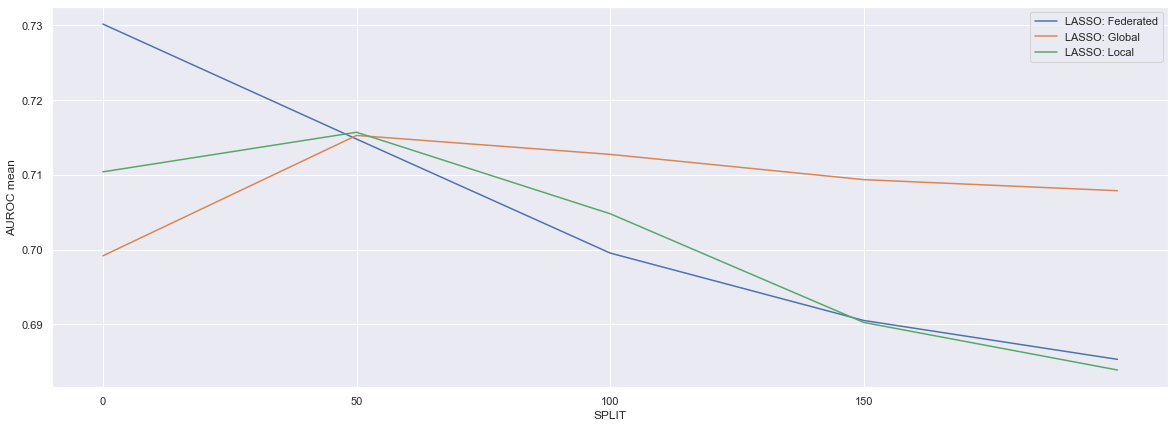

In [27]:
lasso = all_results[all_results['MODEL'].str.contains('LASSO', case = False)]

plt.rcParams["figure.figsize"] = (20,7)
fig, ax = plt.subplots()
ax.set_ylabel("AUROC mean")
for key, df in lasso.groupby('MODEL'):
    df.plot(x='SPLIT', y='AUROC mean', ax=ax, label=key, xticks=split_list)

The results for LASSO seem confusing at first glance. As mentioned earlier, our assumption for the very high AUC of federated learning compared to the globally and locally trained models is that federated learning can reduce overfitting for logistic regression. The data suggest that the effect of reducing overfitting decreases as the number of training data decreases. When the sample size becomes very small (in this case, at about 300 samples), it appears that the federated trained logistic regression classifier again outperforms the locally trained classifier.

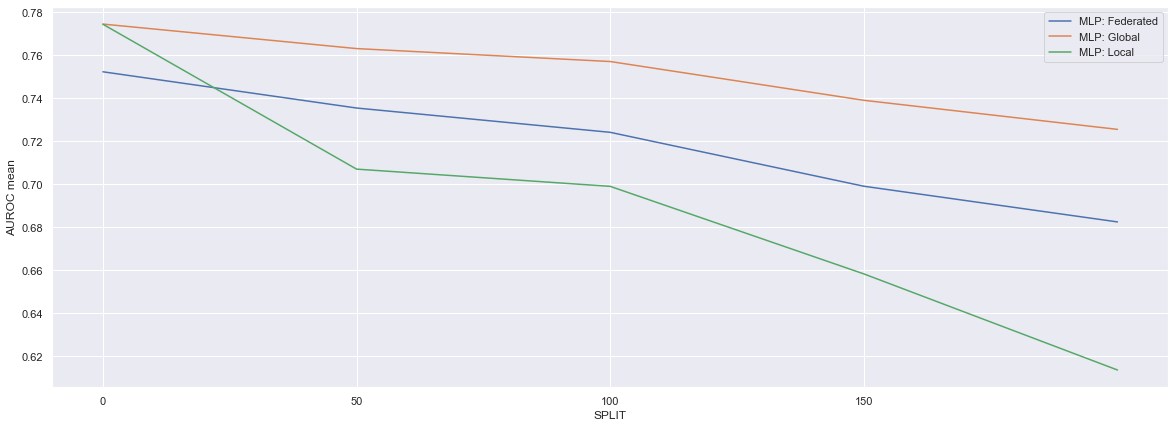

In [28]:
mlp = all_results[all_results['MODEL'].str.contains('MLP', case = False)]

plt.rcParams["figure.figsize"] = (20,7)
fig, ax = plt.subplots()
ax.set_ylabel("AUROC mean")
for key, df in mlp.groupby('MODEL'):
    df.plot(x='SPLIT', y='AUROC mean', ax=ax, label=key, xticks=split_list)

The results for the MLP classifier as expected. While the performance of the globally trained classifiers remains almost the same, the performance of the locally trained classifiers decreases significantly and that of the federated only minimally. Here, the difference in the AUC of the locally and federally trained data becomes larger as the average sample size per dataset becomes smaller. This shows that our assumption that federated learning provides a much greater advantage and improvement over locally trained data when there is not enough training data available locally was correct.

# 5. Conclusion

Concluding, we can say that federated learning can be benificial to e-commerce companies in three different ways or dimensions. Firstly, we identified the increase in data privacy and security provided by federated learning architectures to be valuable even for non-identifiable data. Since the EU General Data Protection Regulation (GDPR) went into effect on May 25, 2018, online companies have been struggling to comply with legal requirements concerning personal data. Federated learning makes a big step into bulletproof data privacy and reduces the risk of security breaches by limiting database access.
Moreover we found that data-driven e-commerce companies can benifit from more secure and transparent data governance and access management by incorporating federated learning into their technology stack. This way they gain fine-grained control over their data and do not run the risk of compromising unveiled information value.
Last but not least the probably most significant benifit wihtin the e-commerce ecosystem is the provided increase in data availability and heterogeneity. The scarcity and homogeneity of data is one of the biggest pitfalls when it comes to training machine learning models. Through federated learning e-commerce players can collaboratively train models with ease in a secure and privacy-preserving manner. 

However, whether federated learning can be expected to perform better than using only local data depends heavily on the available data. Federated learning has been shown to have a superior predictive performance when the available data is scarce and a better performance can be achieved by utilizing larger datasets. To some extent, federated learning could also be used to avoid overfitting of certrain classifiers when very homogeneous or large datasets are present locally. But since this is only an assumption based on the findings of our experiments, further investigation is necessary to prove these findings. Moreover, federated learning in e-commerce data works best on relatively homogeneous datasets. Therefore, it also depends on how similar other participating e-commerce stores are in the context of the features used for prediction. Overall, it is difficult to generalize if and when federated learning is clearly superior to locally trained data, as our experiments have shown that this depends on several conditions.

From here there are multiple directions to pick up on further research. Since the presented data was limited to only three e-commerce shops, we suggest expanding the data collection in order to experiment with more data providers and an increased heterogenity among all datasets. Furthermore, after implementing the horizontal federated learning approach in our empirical analysis, it would also be interesting to experiment with the vertical approach presented earlier. Regarding model selection and evaluation we also suggest diving into tree-based classifiers which often outperform deep neural networks on structured data. A specifically suitable and promising framework based on horizontal federated learning and federated trees was proposed by Li et al. in their paper "Practical Federated Gradient Boosting Decision Trees" in 2020.

# References


<ul>
<li>Konečný, Jakub, Brendan McMahan, and Daniel Ramage. "Federated optimization: Distributed optimization beyond the datacenter." arXiv preprint arXiv:1511.03575 (2015).</li>

<li>Konečný, Jakub, et al. "Federated learning: Strategies for improving communication efficiency." arXiv preprint arXiv:1610.05492 (2016).</li>

<li>Yang, Qiang, et al. "Federated machine learning: Concept and applications." ACM Transactions on Intelligent Systems and Technology (TIST) 10.2 (2019): 1-19.</li>

<li>Bonawitz, Keith, et al. "Towards federated learning at scale: System design." arXiv preprint arXiv:1902.01046 (2019).</li>

<li>Kairouz, Peter, et al. "Advances and open problems in federated learning." arXiv preprint arXiv:1912.04977 (2019).</li>

<li>Li, Tian, et al. "Federated learning: Challenges, methods, and future directions." IEEE Signal Processing Magazine 37.3 (2020): 50-60.</li>

<li>Konečný, Jakub, et al. "Federated optimization: Distributed machine learning for on-device intelligence." arXiv preprint arXiv:1610.02527 (2016).</li>

<li>Smith, Virginia, et al. "Federated multi-task learning." arXiv preprint arXiv:1705.10467 (2017).</li>

<li>Wang, Shiqiang, et al. "Adaptive federated learning in resource constrained edge computing systems." IEEE Journal on Selected Areas in Communications 37.6 (2019): 1205-1221.</li>

<li>Zhao, Yue, et al. "Federated learning with non-iid data." arXiv preprint arXiv:1806.00582 (2018).</li>
    
<li>Rieke, Nicola, et al. "The future of digital health with federated learning." NPJ digital medicine 3.1 (2020): 1-7.</li>
<li>Zhang, Weishan, et al. "Dynamic fusion-based federated learning for COVID-19 detection." IEEE Internet of Things Journal (2021).</li>

<li>Kumar, Rajesh, et al. "Blockchain-federated-learning and deep learning models for covid-19 detection using ct imaging." IEEE Sensors Journal (2021).</li>

<li>Vaid, Akhil, et al. "Federated learning of electronic health records to improve mortality prediction in hospitalized patients with COVID-19: Machine learning approach." JMIR medical informatics 9.1 (2021): e24207.</li>
    
<li>Feki, Ines, et al. "Federated learning for COVID-19 screening from Chest X-ray images." Applied Soft Computing 106 (2021): 107330.</li>

<li>Qayyum, Adnan, et al. "Collaborative federated learning for healthcare: Multi-modal covid-19 diagnosis at the edge." arXiv preprint arXiv:2101.07511 (2021).</li>

<li>Qian, Feng, and Andrew Zhang. "The value of federated learning during and post-COVID-19." International Journal for Quality in Health Care 33.1 (2021): mzab010.</li>

<li>Dou, Qi, et al. "Federated deep learning for detecting COVID-19 lung abnormalities in CT: a privacy-preserving multinational validation study." NPJ digital medicine 4.1 (2021): 1-11.</li>

<li>Yang, Dong, et al. "Federated semi-supervised learning for COVID region segmentation in chest CT using multi-national data from China, Italy, Japan." Medical image analysis 70 (2021): 101992.</li>
    <li>Lim, Wei Yang Bryan, et al. "Federated learning in mobile edge networks: A comprehensive survey." IEEE Communications Surveys & Tutorials 22.3 (2020): 2031-2063.</li>

<li>Khan, Latif U., et al. "Federated learning for edge networks: Resource optimization and incentive mechanism." IEEE Communications Magazine 58.10 (2020): 88-93.</li>

<li>Wang, Xiaofei, et al. "In-edge ai: Intelligentizing mobile edge computing, caching and communication by federated learning." IEEE Network 33.5 (2019): 156-165.</li>

<li>Lu, Xiaofeng, et al. "Privacy-preserving asynchronous federated learning mechanism for edge network computing." IEEE Access 8 (2020): 48970-48981.</li>
    <li>Kim, Hyesung, et al. "Blockchained on-device federated learning." IEEE Communications Letters 24.6 (2019): 1279-1283.</li>

<li>Nguyen, Dinh C., et al. "Federated learning meets blockchain in edge computing: Opportunities and challenges." IEEE Internet of Things Journal (2021).</li>

<li>Li, Yuzheng, et al. "A blockchain-based decentralized federated learning framework with committee consensus." IEEE Network (2020).</li>

<li>Desai, Harsh Bimal, Mustafa Safa Ozdayi, and Murat Kantarcioglu. "Blockfla: Accountable federated learning via hybrid blockchain architecture." Proceedings of the Eleventh ACM Conference on Data and Application Security and Privacy 2021.</li>
    
<li> Li, Qinbin, Zeyi Wen, and Bingsheng He. "Practical federated gradient boosting decision trees." Proceedings of the AAAI Conference on Artificial Intelligence. Vol. 34. No. 04. 2020.
</li>
<li> Robin Gubela, Artem Bequé, Stefan Lessmann, and Fabian Gebert. "Conversion Uplift in E-Commerce: A Systematic Benchmark of Modeling Strategies". International Journal of Information Technology & Decision Making. Vol. 18, No. 03, pp. 747-791 (2019)
</ul>